In [59]:
# import needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

########################## Data connection ##########################
# Define the folder path that contains the files
folder_path = '/content/drive/MyDrive/Colab Notebooks/Carerha/Data/Final Project'
# List all files in the folder
files = os.listdir(folder_path)
dfs = []
# Loop through each file in the folder
for file_name in files:
    # Check if the file ends with ".csv"
    if file_name.endswith(".csv"):
        # Create the full file path
        file_path = os.path.join(folder_path, file_name)
        print(f"Reading file: {file_path}")
        df = pd.read_csv(file_path)
        dfs.append(df)
# Concatenate all the DataFrames in the list into one DataFrame
df_energy = pd.concat(dfs, ignore_index=True)

######################## Data Cleaning and Transformation #################
# replace , >> - in column DateTime
df_energy['DateTime']=df_energy['DateTime'].str.replace(',', '-')

# Modify the month if it's greater than 12
df_energy[df_energy['DateTime'].str[12:14].astype(int) > 12]
df_energy['DateTime'] = df_energy['DateTime'].apply(lambda x: '-'.join([x.split('-')[0], '12' if int(x.split('-')[1]) > 12 else x.split('-')[1], x.split('-')[2]]))

# change type of DateTime to (datetime) and edit date format
df_energy['DateTime'] = df_energy['DateTime'].apply(lambda x: pd.to_datetime(f"20{'-'.join(x.split(' ')[1].split(',')[::-1])} {x.split(' ')[0]}", format='%Y-%m-%d %H:%M:%S'))

# drop dublicated values
df_energy.drop_duplicates(inplace=True)

# remove white space from [KWH/hh (per half hour) ]
df_energy.columns = df_energy.columns.str.strip()

# check
df_energy

Reading file: /content/drive/MyDrive/Colab Notebooks/Carerha/Data/Final Project/Sites Energy Consumption Part_001.csv
Reading file: /content/drive/MyDrive/Colab Notebooks/Carerha/Data/Final Project/Sites Energy Consumption Part_003.csv
Reading file: /content/drive/MyDrive/Colab Notebooks/Carerha/Data/Final Project/Sites Energy Consumption Part_002.csv


,cell_id,DateTime,KWH/hh (per half hour),site_id,region
0,MAC000002,2013-01-01 00:00:00,0.219,A,A
1,MAC000002,2013-01-01 00:30:00,0.241,A,A
2,MAC000002,2013-01-01 01:00:00,0.191,A,A
3,MAC000002,2013-01-01 01:30:00,0.235,A,A
4,MAC000002,2013-01-01 02:00:00,0.182,A,A
...,...,...,...,...,...
1380247,MAC000069,2013-12-05 20:00:00,0.061,G,C
1380248,MAC000069,2013-12-05 20:30:00,0.090,G,C
1380249,MAC000069,2013-12-05 21:00:00,0.069,G,C
1380250,MAC000069,2013-12-05 21:30:00,0.084,G,C


check hidden sheets

In [60]:
file_path='/content/drive/MyDrive/Colab Notebooks/Carerha/Data/Final Project/Demand.xlsx'
# check hidden sheets
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)
df_demand = pd.read_excel(file_path, sheet_name=['Sheet1', 'Sheet2', 'Sheet3'])

['Sheet1', 'Sheet2', 'Sheet3']


read df_demand

In [61]:
# connection dataset >> Demand
df_demand =pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Carerha/Data/Final Project/Demand.xlsx')

# rename col DemandDateTime >> DateTime
df_demand.rename(columns={'DemandDateTime':'DateTime'},inplace=True)

## Validation columns Data
# Column 'Demand' has un expected values >>> Action is removing those ones and only have ['Normal','Low','High']
df_demand=df_demand[df_demand['Demand'].isin(['Normal','Low','High'])]

# check
df_demand


,DateTime,Demand
0,2013-01-01 00:00:00,Normal
1,2013-01-01 00:30:00,Normal
2,2013-01-01 01:00:00,Normal
3,2013-01-01 01:30:00,Normal
4,2013-01-01 02:00:00,Normal
...,...,...
17515,2013-12-31 21:30:00,Normal
17516,2013-12-31 22:00:00,Normal
17517,2013-12-31 22:30:00,Normal
17518,2013-12-31 23:00:00,Normal


In [62]:
df_demand.info()

<class 'pandas.core.frame.DataFrame'>
Index: 17514 entries, 0 to 17519
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   DateTime  17514 non-null  datetime64[ns]
 1   Demand    17514 non-null  object        
dtypes: datetime64[ns](1), object(1)
memory usage: 410.5+ KB


In [63]:
# check unique values of col Demand
df_demand['Demand'].unique()


array(['Normal', 'Low', 'High'], dtype=object)

In [64]:
df_demand[df_demand['DateTime']=='2013-01-06 14:00:00	']

,DateTime,Demand


 merge df_enargy and df_demand To calculate the cost of consumption

In [65]:
# merge df_enargy and df_demand
df_merged = pd.merge(df_energy, df_demand, on='DateTime', how='left')
# check
df_merged
df_merged[df_merged.isnull().any(axis=1)]

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand
6985,MAC000002,2013-01-06 14:00:00,0.982,A,A,NaN
23895,MAC000003,2013-01-06 14:00:00,0.075,P,B,NaN
37822,MAC000004,2013-01-06 14:00:00,0.000,E,A,NaN
49783,MAC000006,2013-01-06 14:00:00,0.016,Q,B,NaN
65471,MAC000007,2013-01-06 14:00:00,0.117,H,C,NaN
...,...,...,...,...,...,...
1193258,MAC000062,2013-01-06 14:00:00,0.249,H,C,NaN
1210247,MAC000063,2013-01-06 14:00:00,0.139,D,A,NaN
1222005,MAC000066,2013-01-06 14:00:00,0.142,E,A,NaN
1238090,MAC000067,2013-01-06 14:00:00,0.208,N,B,NaN


In [66]:
# check nullvalues
df_merged.isnull().sum()

,0
cell_id,0
DateTime,0
KWH/hh (per half hour),0
site_id,0
region,0
Demand,79


fixed null values

In [67]:
import pandas as pd

# Define threshold using quantile (75th percentile)
threshold = df_merged['KWH/hh (per half hour)'].quantile(0.75)  # 75th percentile

# Function to classify and fill missing values based on threshold and region
def classify_and_fill(row, threshold):
    if pd.isna(row['Demand']):  # If the value is NaN
        if row['region'] == 'A':  # For region A
            if row['KWH/hh (per half hour)'] >= threshold:
                return 'High'
            else:
                return 'Low'
        elif row['region'] == 'B':  # For region B
            if row['KWH/hh (per half hour)'] >= threshold:
                return 'High'
            else:
                return 'Low'
        elif row['region'] == 'C':  # For region C
            if row['KWH/hh (per half hour)'] >= threshold:
                return 'Normal'
            else:
                return 'Low'
        elif row['region'] == 'D':  # For region D
            if row['KWH/hh (per half hour)'] >= threshold:
                return 'High'
            else:
                return 'Normal'
        else:
            return 'Normal'  # Default if region is not defined
    return row['Demand']  # If the value is already present, leave it as is

# Fill missing values based on threshold and region
df_merged['Demand'] = df_merged.apply(lambda row: classify_and_fill(row, threshold), axis=1)

# Display the result
df_merged


,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,Normal
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,Normal
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,Normal
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,Normal
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,Normal
...,...,...,...,...,...,...
1271206,MAC000069,2013-12-05 20:00:00,0.061,G,C,Normal
1271207,MAC000069,2013-12-05 20:30:00,0.090,G,C,Normal
1271208,MAC000069,2013-12-05 21:00:00,0.069,G,C,Normal
1271209,MAC000069,2013-12-05 21:30:00,0.084,G,C,Normal


In [68]:
# check nullvalues
df_merged.isnull().sum()

,0
cell_id,0
DateTime,0
KWH/hh (per half hour),0
site_id,0
region,0
Demand,0


In [69]:
df_merged[df_merged.isnull().any(axis=1)]

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand


In [70]:
df_merged[df_merged['DateTime'] == '2013-01-06 14:00:00']

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand
6985,MAC000002,2013-01-06 14:00:00,0.982,A,A,High
23895,MAC000003,2013-01-06 14:00:00,0.075,P,B,Low
37822,MAC000004,2013-01-06 14:00:00,0.000,E,A,Low
49783,MAC000006,2013-01-06 14:00:00,0.016,Q,B,Low
65471,MAC000007,2013-01-06 14:00:00,0.117,H,C,Low
...,...,...,...,...,...,...
1193258,MAC000062,2013-01-06 14:00:00,0.249,H,C,Low
1210247,MAC000063,2013-01-06 14:00:00,0.139,D,A,Low
1222005,MAC000066,2013-01-06 14:00:00,0.142,E,A,Low
1238090,MAC000067,2013-01-06 14:00:00,0.208,N,B,Low


calculate the cost of consumption [low,high,normal]

Demand prices for calculating cost KW and EGP :

• High (77.21p/kWh) / 100 converted from pence to pounds (EGP)

• Normal (19.46p/kWh)  / 100 converted from pence to pounds (EGP)

• Low (6.89p/kWh)   / 100 converted from pence to pounds (EGP)

In [71]:
# Prices are converted from pence to pounds (dividing by 100)
high_price = 77.21 / 100
low_price =  6.89 /100
normal_price = 19.46 /100

# calculate the Energy Consumption of consumption and stored in col [Energy Consumption]
# create a function that calculates the cost
def calculate_Energy_Consumption(row):
  if row['Demand']=='High':
      # Check if the column name is 'KWH/hh', if not, adjust accordingly
      # For example, if the column name is 'kwh/hh (per half hour', change it to: return row['kwh/hh (per half hour']*high_price
      return row['KWH/hh (per half hour)']*high_price
  elif row['Demand']=='Low':
      return row['KWH/hh (per half hour)']*low_price
  elif row['Demand']=='Normal':
      return row['KWH/hh (per half hour)']*normal_price
  else:
      return None

df_merged['total_price(EGP)'] = df_merged.apply(calculate_Energy_Consumption, axis=1)

# check
df_merged

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,total_price(EGP)
0,MAC000002,2013-01-01 00:00:00,0.219,A,A,Normal,0.042617
1,MAC000002,2013-01-01 00:30:00,0.241,A,A,Normal,0.046899
2,MAC000002,2013-01-01 01:00:00,0.191,A,A,Normal,0.037169
3,MAC000002,2013-01-01 01:30:00,0.235,A,A,Normal,0.045731
4,MAC000002,2013-01-01 02:00:00,0.182,A,A,Normal,0.035417
...,...,...,...,...,...,...,...
1271206,MAC000069,2013-12-05 20:00:00,0.061,G,C,Normal,0.011871
1271207,MAC000069,2013-12-05 20:30:00,0.090,G,C,Normal,0.017514
1271208,MAC000069,2013-12-05 21:00:00,0.069,G,C,Normal,0.013427
1271209,MAC000069,2013-12-05 21:30:00,0.084,G,C,Normal,0.016346


Normally, at a certain time, there is no electricity consumption, so it is disconnected.

In [72]:
df_merged[df_merged['total_price(EGP)']==0]


,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,total_price(EGP)
33823,MAC000004,2013-01-01 00:00:00,0.0,E,A,Normal,0.0
33824,MAC000004,2013-01-01 00:30:00,0.0,E,A,Normal,0.0
33825,MAC000004,2013-01-01 01:00:00,0.0,E,A,Normal,0.0
33827,MAC000004,2013-01-01 02:00:00,0.0,E,A,Normal,0.0
33828,MAC000004,2013-01-01 02:30:00,0.0,E,A,Normal,0.0
...,...,...,...,...,...,...,...
1178503,MAC000061,2013-01-07 12:30:00,0.0,Q,B,Normal,0.0
1178885,MAC000061,2013-09-07 11:30:00,0.0,Q,B,Normal,0.0
1178924,MAC000061,2013-10-07 07:00:00,0.0,Q,B,Normal,0.0
1178964,MAC000061,2013-11-07 03:00:00,0.0,Q,B,Normal,0.0


In [73]:
df_merged['region'].value_counts()

,count
region,
A,486102
B,407045
C,345378
D,32686


sample form dataset

In [74]:
from statsmodels.stats.proportion import proportion_effectsize
from statsmodels.stats.power import TTestIndPower

success_rate_A = 0.13
success_rate_B = 0.15
success_rate_C = 0.14
success_rate_D = 0.16

effect_size_AB = proportion_effectsize(success_rate_A, success_rate_B)
effect_size_CD = proportion_effectsize(success_rate_C, success_rate_D)

n_sample_req_AB = TTestIndPower().solve_power(
    effect_size = effect_size_AB,
    power = 0.8,
    alpha = 0.05
)

n_sample_req_CD = TTestIndPower().solve_power(
    effect_size = effect_size_CD,
    power = 0.8,
    alpha = 0.05
)

n_sample_req = min(int(round(n_sample_req_AB, 0)), int(round(n_sample_req_CD, 0)))
n_sample_req = n_sample_req * 2
print(n_sample_req)


9440


In [75]:
# sample data
A_sample = df_merged[df_merged['region'] == 'A'].sample(n = n_sample_req, random_state = 22)
B_sample = df_merged[df_merged['region'] == 'B'].sample(n = n_sample_req, random_state = 22)
C_sample = df_merged[df_merged['region'] == 'C'].sample(n = n_sample_req, random_state = 22)
D_sample = df_merged[df_merged['region'] == 'D'].sample(n = n_sample_req, random_state = 22)
ab_test_df = pd.concat([A_sample,B_sample,C_sample,D_sample]).reset_index(drop = True)
ab_test_df

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,total_price(EGP)
0,MAC000084,2013-12-07 21:00:00,0.243,D,A,Normal,0.047288
1,MAC000018,2013-12-10 18:00:00,0.220,E,A,High,0.169862
2,MAC000079,2013-12-01 05:30:00,0.164,D,A,Normal,0.031914
3,MAC000049,2013-12-03 03:30:00,0.172,E,A,Normal,0.033471
4,MAC000072,2013-12-11 06:30:00,0.008,E,A,Normal,0.001557
...,...,...,...,...,...,...,...
37755,MAC000099,2013-10-04 23:00:00,0.139,U,D,Normal,0.027049
37756,MAC000023,2013-12-07 00:30:00,0.058,U,D,Low,0.003996
37757,MAC000099,2013-12-11 14:00:00,0.065,U,D,Normal,0.012649
37758,MAC000023,2013-06-09 07:30:00,0.746,U,D,Normal,0.145172


In [76]:
ab_test_df.describe(include=['number'])  # Include only numerical columns

,KWH/hh (per half hour),total_price(EGP)
count,37760.000000,37760.000000
mean,0.230498,0.049656
std,0.298488,0.083277
min,0.000000,0.000000
25%,0.070000,0.011287
50%,0.131000,0.023352
75%,0.269000,0.052931
max,5.863000,1.631447


<Axes: xlabel='KWH/hh (per half hour)', ylabel='Count'>

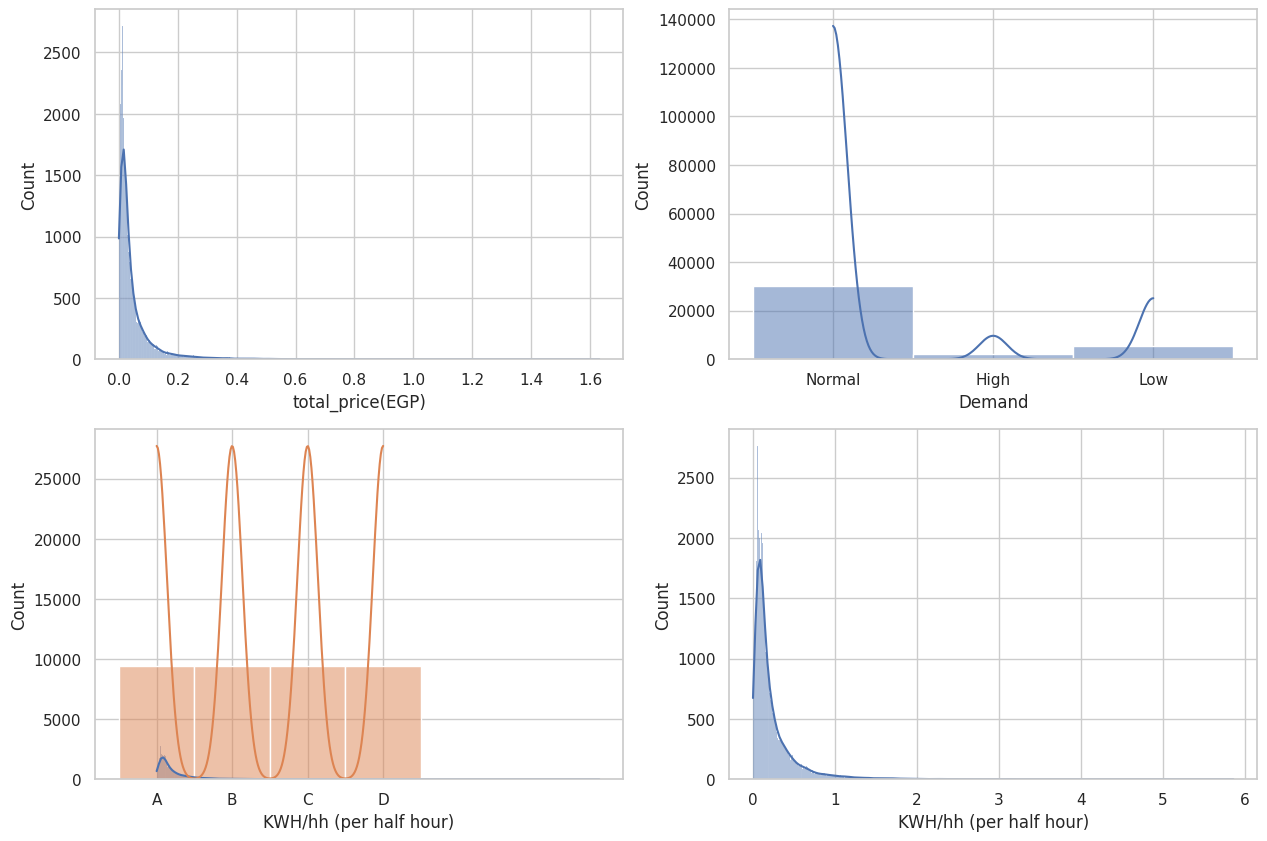

In [77]:
fig , axis = plt.subplots(2,2,figsize=(15,10))
sns.histplot(data=ab_test_df, x='total_price(EGP)' , ax = axis[0,0],kde=True)
sns.histplot(data=ab_test_df , x='Demand' , ax =axis[0,1],kde=True)
sns.histplot(data=ab_test_df , x='KWH/hh (per half hour)' , ax =axis[1,0],kde=True)
sns.histplot(data=ab_test_df , x='region' , ax =axis[1,0],kde=True)
sns.histplot(data=ab_test_df , x='KWH/hh (per half hour)' , ax =axis[1,1],kde=True)

<Axes: xlabel='total_price(EGP)'>

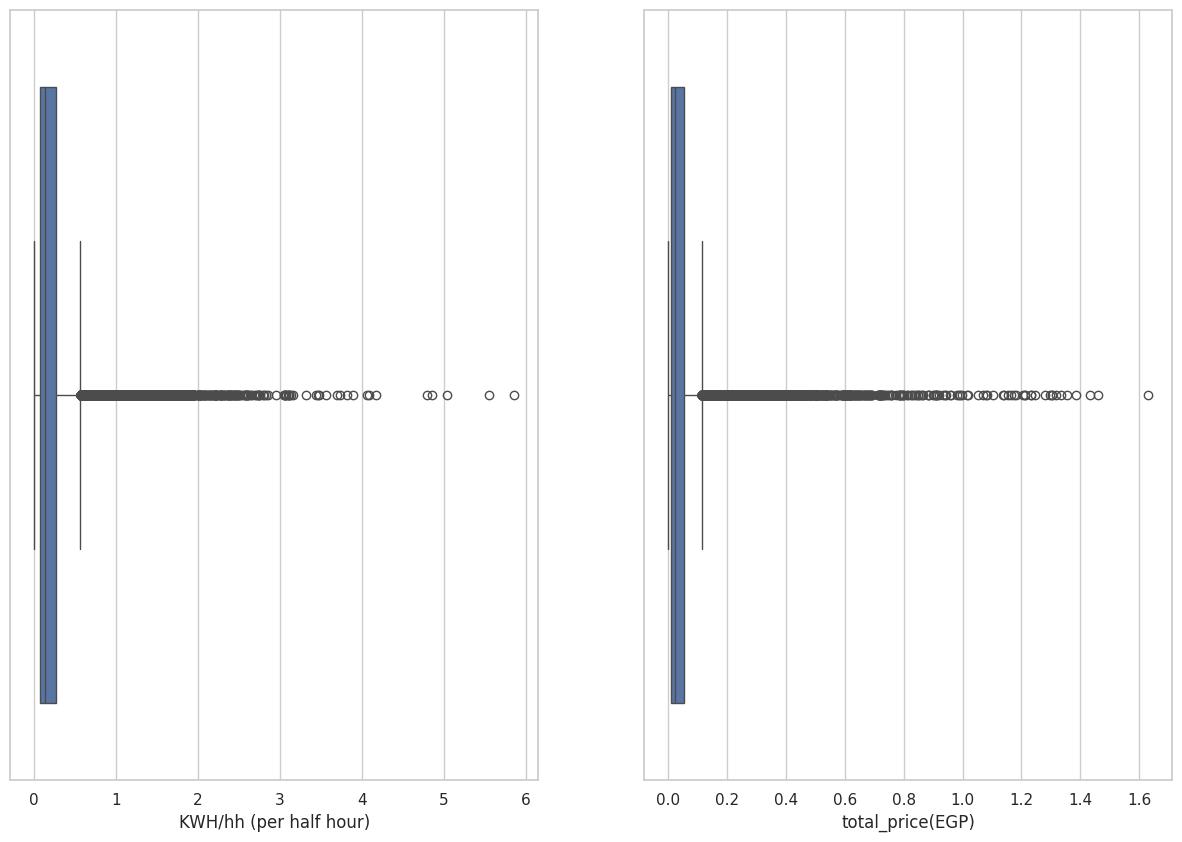

In [78]:
fig, axis = plt.subplots(1,2, figsize = (15,10))

sns.boxplot(data = ab_test_df, x = 'KWH/hh (per half hour)', ax = axis[0])
sns.boxplot(data = ab_test_df, x = 'total_price(EGP)', ax = axis[1])


In [79]:
! pip install pyod

Anomaly Detection

In [80]:
##### Anomaly Detection using IQR

# Univariate Detection Logic
def find_anomalies_IQR(ab_test_df, col_name): # using df_merged as input
  # Check if column exists before accessing it
  if col_name in ab_test_df.columns:
    q1, q3 = np.quantile(ab_test_df[col_name], [0.25, 0.75])
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    ab_test_df['AD_IQR_' + col_name] = np.where((ab_test_df[col_name] > upper_bound) | (ab_test_df[col_name] < lower_bound), 1, 0)

  return ab_test_df

for col in ['KWH/hh (per half hour)', 'total_price(EGP)']:
  ab_test_df = find_anomalies_IQR(ab_test_df, col)

# Multivariate Detection Logic

from pyod.models.abod import ABOD
from pyod.models.knn import KNN
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

for col in ['KWH/hh (per half hour)', 'total_price(EGP)']:
  # Use df_merged instead of df for scaling
  ab_test_df[col + '_scaled'] = scaler.fit_transform(ab_test_df[[col]])

features = ab_test_df[[col for col in ab_test_df.columns if '_scaled' in col]]

# Intiate Each Multivariate Model
ab_test_df['AD_ABOD'] = ABOD().fit(features).labels_
ab_test_df['AD_KNN'] = KNN().fit(features).labels_
ab_test_df['AD_LOF'] = LOF().fit(features).labels_
ab_test_df['AD_IForest'] = IForest().fit(features).labels_

ab_test_df['AD_Final_vote'] = ab_test_df[['AD_ABOD', 'AD_KNN', 'AD_LOF', 'AD_IForest']].sum(axis = 1)
ab_test_df['AD_Final_vote'] = np.where(ab_test_df['AD_Final_vote'] >2, 1, 0)

# Check results
ab_test_df

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3787: RuntimeWarning:

Degrees of freedom <= 0 for slice

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:163: RuntimeWarning:

invalid value encountered in divide

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning:

invalid value encountered in scalar divide



,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,total_price(EGP),AD_IQR_KWH/hh (per half hour),AD_IQR_total_price(EGP),KWH/hh (per half hour)_scaled,total_price(EGP)_scaled,AD_ABOD,AD_KNN,AD_LOF,AD_IForest,AD_Final_vote
0,MAC000084,2013-12-07 21:00:00,0.243,D,A,Normal,0.047288,0,0,0.041886,-0.028442,0,0,0,0,0
1,MAC000018,2013-12-10 18:00:00,0.220,E,A,High,0.169862,0,1,-0.035170,1.443470,0,1,0,1,0
2,MAC000079,2013-12-01 05:30:00,0.164,D,A,Normal,0.031914,0,0,-0.222785,-0.213051,0,0,0,0,0
3,MAC000049,2013-12-03 03:30:00,0.172,E,A,Normal,0.033471,0,0,-0.195982,-0.194356,0,0,0,0,0
4,MAC000072,2013-12-11 06:30:00,0.008,E,A,Normal,0.001557,0,0,-0.745426,-0.577595,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37755,MAC000099,2013-10-04 23:00:00,0.139,U,D,Normal,0.027049,0,0,-0.306541,-0.271471,0,0,0,0,0
37756,MAC000023,2013-12-07 00:30:00,0.058,U,D,Low,0.003996,0,0,-0.577913,-0.548302,0,0,0,0,0
37757,MAC000099,2013-12-11 14:00:00,0.065,U,D,Normal,0.012649,0,0,-0.554461,-0.444396,0,0,0,0,0
37758,MAC000023,2013-06-09 07:30:00,0.746,U,D,Normal,0.145172,1,1,1.727069,1.146979,0,0,0,1,0


In [81]:
ab_test_df[ab_test_df['AD_Final_vote']==1]

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,total_price(EGP),AD_IQR_KWH/hh (per half hour),AD_IQR_total_price(EGP),KWH/hh (per half hour)_scaled,total_price(EGP)_scaled,AD_ABOD,AD_KNN,AD_LOF,AD_IForest,AD_Final_vote
5,MAC000049,2013-12-09 04:00:00,0.712,E,A,Low,0.049057,1,0,1.613160,-0.007199,0,1,1,1,1
8,MAC000096,2013-12-10 21:30:00,0.538,C,A,High,0.415390,0,1,1.030214,4.391849,0,1,1,1,1
18,MAC000063,2013-10-07 01:30:00,0.483,D,A,Low,0.033279,0,0,0.845950,-0.196668,0,1,1,1,1
32,MAC000035,2013-12-06 10:30:00,1.244,E,A,Low,0.085712,1,0,3.395501,0.432964,0,1,1,1,1
33,MAC000079,2013-12-08 17:00:00,0.219,D,A,High,0.169090,0,1,-0.038520,1.434198,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37686,MAC000023,2013-12-06 14:00:00,0.827,U,D,Low,0.056980,1,0,1.998440,0.087949,0,1,1,1,1
37687,MAC000023,2013-05-04 15:00:00,0.885,U,D,Normal,0.172221,1,1,2.192756,1.471797,0,1,1,1,1
37694,MAC000023,2013-03-01 20:00:00,1.778,U,D,Normal,0.345999,1,1,5.184542,3.558579,0,1,1,1,1
37726,MAC000023,2013-12-03 14:00:00,0.729,U,D,Normal,0.141863,1,1,1.670115,1.107253,0,1,1,1,1


Treatment

* Imputation

In [82]:
# Imputation Anomalies

ab_test_df.loc[ab_test_df['AD_Final_vote'] == 1, 'KWH/hh (per half hour)'] = ab_test_df.groupby(['region', 'Demand'])['KWH/hh (per half hour)'].transform('median')
ab_test_df.loc[ab_test_df['AD_Final_vote'] == 1, 'total_price(EGP)'] = ab_test_df.groupby(['region', 'Demand'])['total_price(EGP)'].transform('median')



In [83]:
ab_test_df[ab_test_df['AD_Final_vote']==1]

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,total_price(EGP),AD_IQR_KWH/hh (per half hour),AD_IQR_total_price(EGP),KWH/hh (per half hour)_scaled,total_price(EGP)_scaled,AD_ABOD,AD_KNN,AD_LOF,AD_IForest,AD_Final_vote
5,MAC000049,2013-12-09 04:00:00,0.161,E,A,Low,0.011093,1,0,1.613160,-0.007199,0,1,1,1,1
8,MAC000096,2013-12-10 21:30:00,0.191,C,A,High,0.147471,0,1,1.030214,4.391849,0,1,1,1,1
18,MAC000063,2013-10-07 01:30:00,0.161,D,A,Low,0.011093,0,0,0.845950,-0.196668,0,1,1,1,1
32,MAC000035,2013-12-06 10:30:00,0.161,E,A,Low,0.011093,1,0,3.395501,0.432964,0,1,1,1,1
33,MAC000079,2013-12-08 17:00:00,0.191,D,A,High,0.147471,0,1,-0.038520,1.434198,0,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37686,MAC000023,2013-12-06 14:00:00,0.096,U,D,Low,0.006614,1,0,1.998440,0.087949,0,1,1,1,1
37687,MAC000023,2013-05-04 15:00:00,0.103,U,D,Normal,0.020044,1,1,2.192756,1.471797,0,1,1,1,1
37694,MAC000023,2013-03-01 20:00:00,0.103,U,D,Normal,0.020044,1,1,5.184542,3.558579,0,1,1,1,1
37726,MAC000023,2013-12-03 14:00:00,0.103,U,D,Normal,0.020044,1,1,1.670115,1.107253,0,1,1,1,1


<Axes: xlabel='total_price(EGP)'>

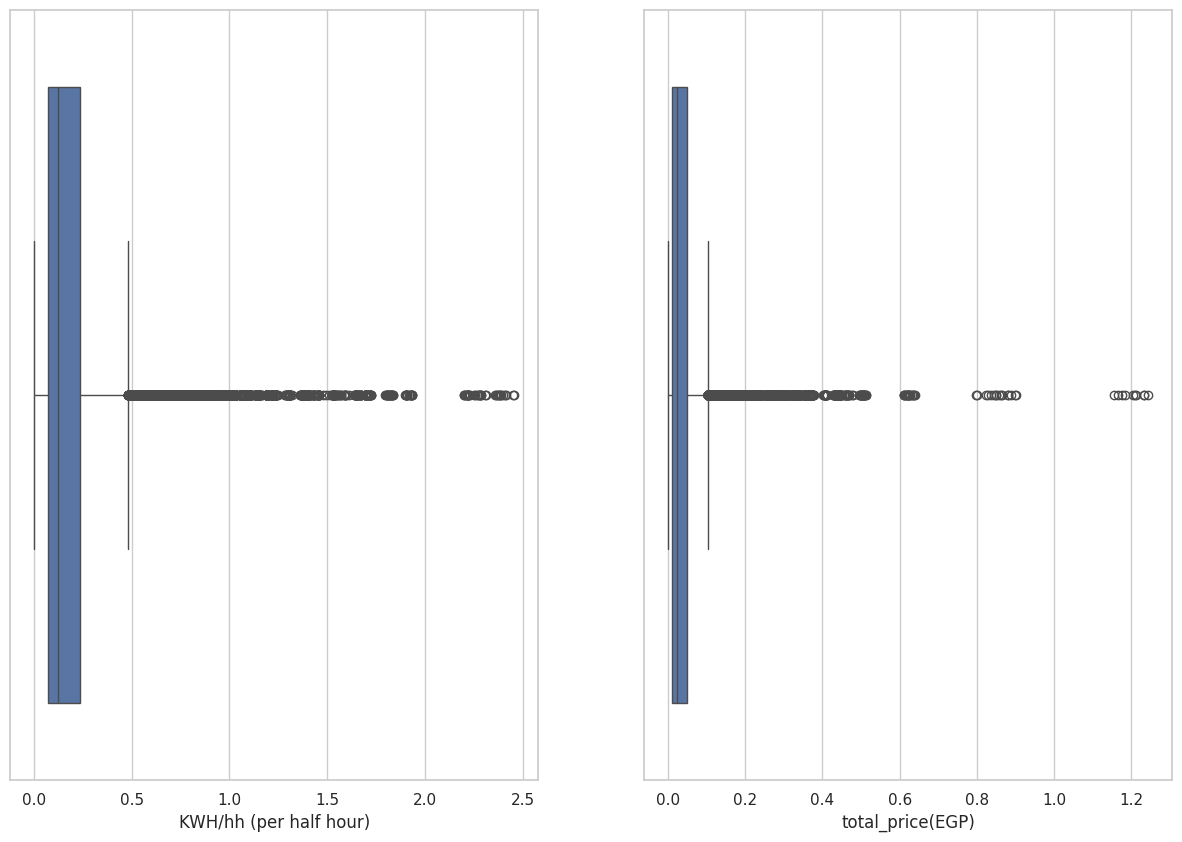

In [84]:
# check anomaly to outlier
fig, axis = plt.subplots(1,2, figsize = (15,10))

sns.boxplot(data = ab_test_df, x = 'KWH/hh (per half hour)', ax = axis[0])
sns.boxplot(data = ab_test_df, x = 'total_price(EGP)', ax = axis[1])

In [85]:
import re

def remove_cols_containing_words(ab_test_df, words_list):
  """Removes columns from a pandas DataFrame that contain any of the specified words.

  Args:
    df: The pandas DataFrame to modify.
    words_list: A list of words to search for in column names.

  Returns:
    A new pandas DataFrame with the specified columns removed.
  """

  # Create a regular expression pattern to match any of the words in the list.
  pattern = '|'.join(words_list)

  # Get a list of columns that match the pattern.
  cols_to_remove = [col for col in ab_test_df.columns if re.search(pattern, col)]

  # Drop the columns from the DataFrame.
  ab_test_df = ab_test_df.drop(columns=cols_to_remove)

  return ab_test_df

ab_test_df = remove_cols_containing_words(ab_test_df, ['AD_', '_scaled'])

ab_test_df

,cell_id,DateTime,KWH/hh (per half hour),site_id,region,Demand,total_price(EGP)
0,MAC000084,2013-12-07 21:00:00,0.243,D,A,Normal,0.047288
1,MAC000018,2013-12-10 18:00:00,0.220,E,A,High,0.169862
2,MAC000079,2013-12-01 05:30:00,0.164,D,A,Normal,0.031914
3,MAC000049,2013-12-03 03:30:00,0.172,E,A,Normal,0.033471
4,MAC000072,2013-12-11 06:30:00,0.008,E,A,Normal,0.001557
...,...,...,...,...,...,...,...
37755,MAC000099,2013-10-04 23:00:00,0.139,U,D,Normal,0.027049
37756,MAC000023,2013-12-07 00:30:00,0.058,U,D,Low,0.003996
37757,MAC000099,2013-12-11 14:00:00,0.065,U,D,Normal,0.012649
37758,MAC000023,2013-06-09 07:30:00,0.746,U,D,Normal,0.145172


Feature Engineering



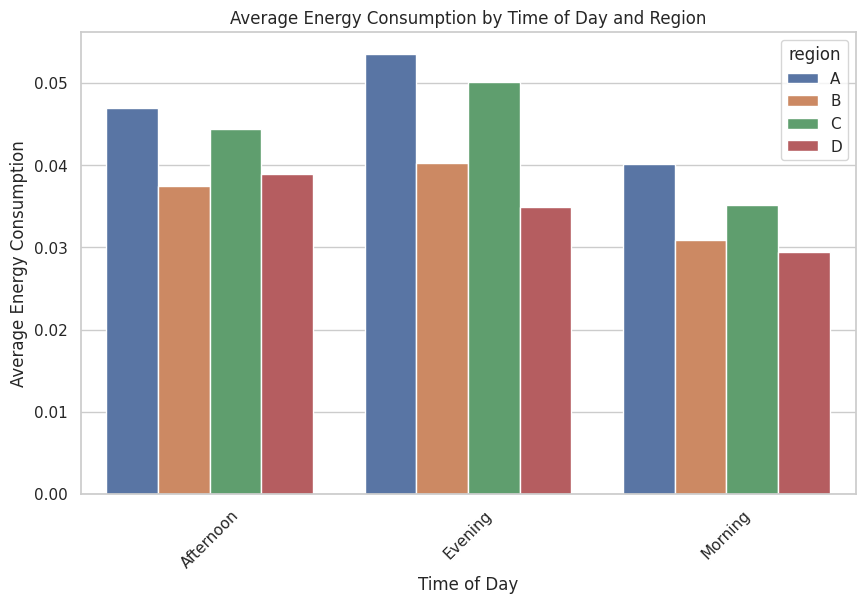

In [86]:
# Feature Engineering
# Extract hour from DateTime column
ab_test_df['hour'] = ab_test_df['DateTime'].dt.hour

# Classify the time into periods (Morning, Afternoon, Evening)
def time_of_day(hour):
    if 6 <= hour < 12:
        return 'Morning'  # Morning from 6 AM to 12 PM
    elif 12 <= hour < 18:
        return 'Afternoon'  # Afternoon from 12 PM to 6 PM
    else:
        return 'Evening'  # Evening from 6 PM to 6 AM

# Apply the function to classify time for each row
ab_test_df['Time_of_day'] = ab_test_df['hour'].apply(time_of_day)

# Calculate average energy consumption based on region and time of day
consumption_by_time_and_region = ab_test_df.groupby(['region', 'Time_of_day'])[['total_price(EGP)']].mean()

# Plotting the visualization
plt.figure(figsize=(10, 6))

# Using Seaborn to display average energy consumption for each region and time of day
sns.barplot(data=consumption_by_time_and_region.reset_index(),
            x='Time_of_day', y='total_price(EGP)', hue='region')

# Customizing title and labels
plt.title('Average Energy Consumption by Time of Day and Region')
plt.xlabel('Time of Day')
plt.ylabel('Average Energy Consumption')
plt.xticks(rotation=45)

# Display the plot
plt.show()


concolution:
The energy consumption in Morning and Afternoon periods may vary across different regions, but typically the Evening period tends to show a higher energy consumption due to increased activities like lighting and heating.
In some regions, the Morning or Afternoon periods show lower consumption as fewer activities may be happening, and the demand for energy could be lower during the daytime.

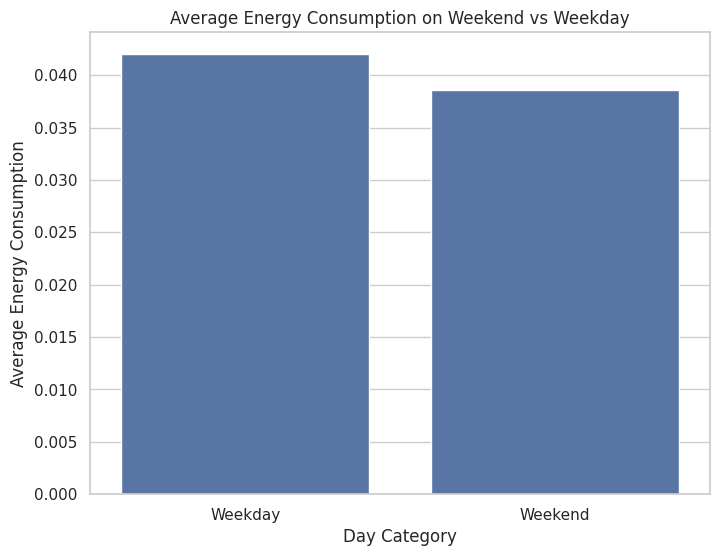

In [87]:
# Feature Engineering / Adding new cols

# Extract the day of the week from the DateTime column
ab_test_df['day_of_week'] = ab_test_df['DateTime'].dt.day_name()

# Classify days into 'Weekend' for Friday and Saturday, and 'Weekday' for the rest of the days
def classify_day(day):
    if day in ['Friday', 'Saturday']:
        return 'Weekend'  # Friday and Saturday are classified as Weekend
    else:
        return 'Weekday'  # Other days are classified as Weekdays

# Apply the classification function to the day_of_week column
ab_test_df['Day_Category'] = ab_test_df['day_of_week'].apply(classify_day)

# Calculate average energy consumption based on 'Day_Category'
consumption_by_day_category = ab_test_df.groupby('Day_Category')[['total_price(EGP)']].mean()

# Plot the visualization
plt.figure(figsize=(8, 6))

# Use Seaborn to create a bar plot comparing average energy consumption on Weekend vs Weekday
sns.barplot(x=consumption_by_day_category.index, y=consumption_by_day_category['total_price(EGP)'])

# Customize title and labels
plt.title('Average Energy Consumption on Weekend vs Weekday')
plt.xlabel('Day Category')
plt.ylabel('Average Energy Consumption')

# Display the plot
plt.show()



Conclusion:
In essence, the higher energy consumption observed on weekdays compared to weekends can largely be attributed to increased working hours, commercial and industrial operations, and the more structured daily routines that require consistent energy use. Weekends, on the other hand, often have less commercial activity, fewer people working in offices or factories, and more energy-efficient patterns of consumption as people tend to be away from home or engage in outdoor activities.

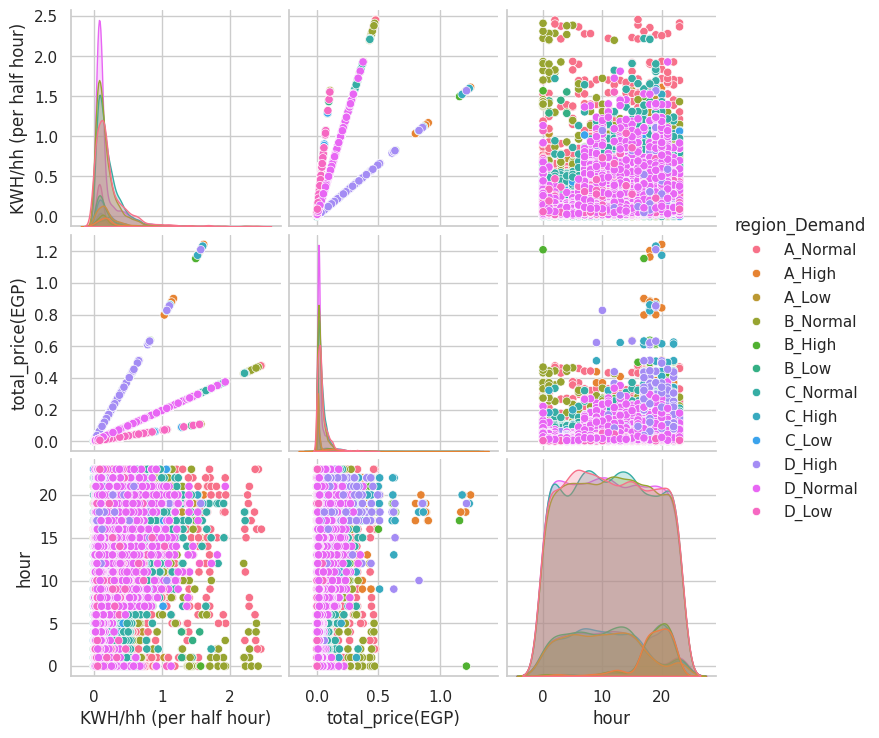

In [88]:
# Feature Engineering / Adding new cols
ab_test_df['region_Demand'] = ab_test_df['region'] + '_' + ab_test_df['Demand']
sns.pairplot(ab_test_df, hue = 'region_Demand')

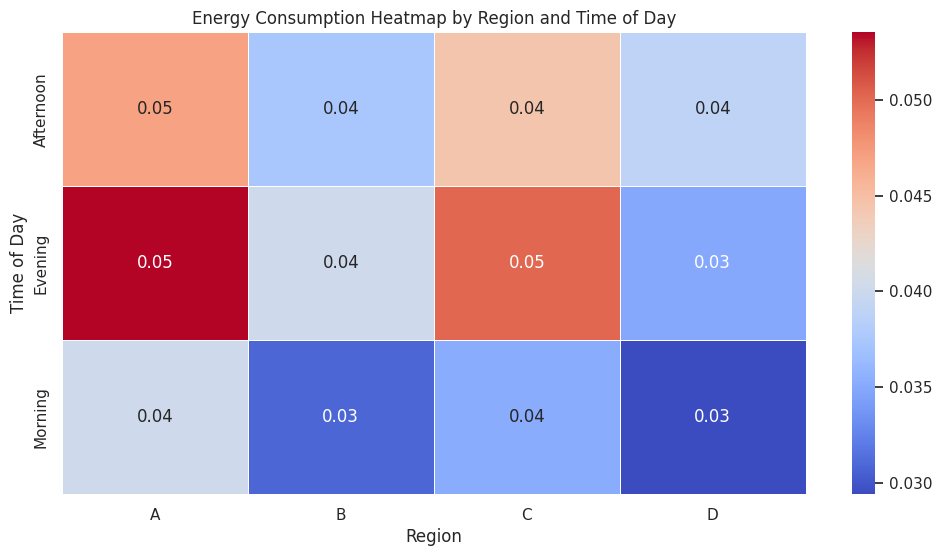

In [89]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average energy consumption by region and time of day
region_consumption = ab_test_df.groupby(['region', 'Time_of_day'])['total_price(EGP)'].mean().reset_index()

# Pivot the data for heatmap visualization
region_consumption_pivot = region_consumption.pivot(index='Time_of_day', columns='region', values='total_price(EGP)')

# Plotting Heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(region_consumption_pivot, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the plot
plt.title('Energy Consumption Heatmap by Region and Time of Day')
plt.xlabel('Region')
plt.ylabel('Time of Day')
plt.show()


In [90]:
# Assuming ab_test_df is your DataFrame with 'region', 'Time_of_day', and 'KWH/hh (per half hour)' columns

# Create pivot table to find the average energy consumption per region and time of day
pivot_table = ab_test_df.pivot_table(
    values='KWH/hh (per half hour)',
    index='region',  # Group by region
    columns='Time_of_day',  # Group by Time of Day (e.g., Morning, Afternoon, Evening)
    aggfunc='mean'  # Calculate the mean energy consumption
)

# Display the pivot table
print(pivot_table)


Time_of_day  Afternoon   Evening   Morning
region                                    
A             0.237108  0.232281  0.224388
B             0.190386  0.172713  0.173527
C             0.221710  0.207214  0.200343
D             0.196489  0.148910  0.164212


In [91]:
ab_test_df.describe(include=['number'])

,KWH/hh (per half hour),total_price(EGP),hour
count,37760.000000,37760.000000,37760.000000
mean,0.195653,0.041269,11.607707
std,0.217711,0.059069,6.900672
min,0.000000,0.000000,0.000000
25%,0.070000,0.011093,6.000000
50%,0.125000,0.022574,12.000000
75%,0.235000,0.047872,18.000000
max,2.458000,1.244625,23.000000


# Hypothesis
 mean(0.19) > medain(0.12) >>> Right skewed
# H Test



<ipython-input-92-ad44f6c10714>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='KWH/hh (per half hour)', ylabel='Density'>

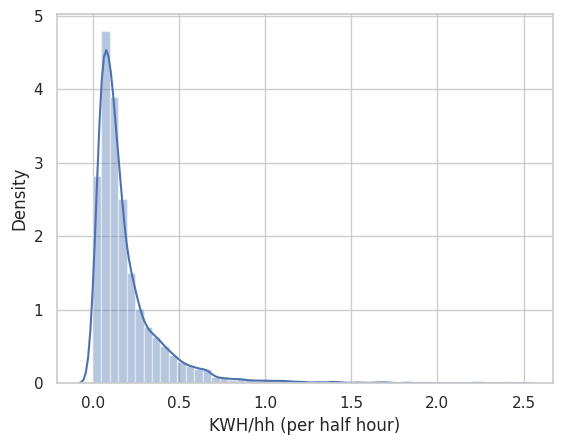

In [92]:
sns.distplot(ab_test_df['KWH/hh (per half hour)'])

In [93]:
# (H0): The distribution of energy consumption is the same across all regions (no significant difference).
# (H1): The distribution of energy consumption is different across regions (at least one region has a significantly different distribution)
from scipy.stats import kruskal

# Group the data by region and split into lists of energy consumption
regions = ab_test_df['region'].unique()
energy_by_region = [ab_test_df[ab_test_df['region'] == region]['KWH/hh (per half hour)'] for region in regions]

# Perform Kruskal-Wallis H Test
stat, p_value = kruskal(*energy_by_region)

# Output the result
print(f"Kruskal-Wallis H Test: H-Statistic = {stat:.2f}, P-Value = {p_value:.4f}")

# Interpretation
if p_value < 0.05:
  print('Reject H0')
else:
  print('Failed to Reject H0')

# p-value < 0.05: Reject H0, meaning region significantly affects energy consumption.
# p-value >= 0.05: Fail to reject H0, meaning region does not significantly affect energy

Kruskal-Wallis H Test: H-Statistic = 1009.49, P-Value = 0.0000
Reject H0


Conclusion:
Since your data is right-skewed, Kruskal-Wallis H Test is the appropriate test to use.
If the p-value is less than 0.05, you can conclude that region significantly affects energy consumption.

<ipython-input-94-4b17a03dfba0>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='DateTime', ylabel='Density'>

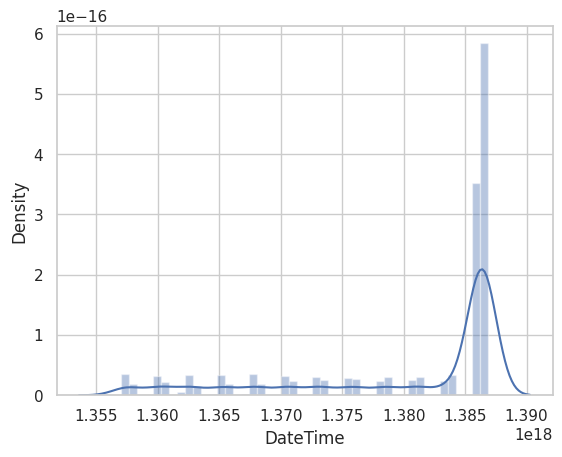

In [94]:
sns.distplot(ab_test_df['DateTime'])

ANOVA Test (Analysis of Variance)  >>> normal

Is there a relationship between the time of day and energy consumption?




In [95]:
!pip install pingouin

In [96]:
import pandas as pd
import pingouin as pg

# Assuming 'ab_test_df' is your DataFrame with 'DateTime' and 'KWH/hh (per half hour)' columns

# Create 'Time_of_day' based on the hour
def categorize_time(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 24:
        return 'Evening'
    else:
        return 'Night'

# Add 'Time_of_day' to the dataframe
ab_test_df['Time_of_day'] = ab_test_df['DateTime'].dt.hour.apply(categorize_time)

# Step 2: Perform One-Way ANOVA to check if time of day significantly affects energy consumption
result = pg.anova(data=ab_test_df, dv='KWH/hh (per half hour)', between='Time_of_day', detailed=True)

# Step 3: Print the result of ANOVA
print(result)

# Interpretation of the p-value
if result['p-unc'][0] < 0.05:
    print("Reject H0: There is a significant relationship between time of day and energy consumption.")
else:
    print("Fail to Reject H0: There is no significant relationship between time of day and energy consumption.")


        Source           SS     DF         MS           F          p-unc  \
0  Time_of_day    63.937187      3  21.312396  466.266376  1.634117e-297   
1       Within  1725.774915  37756   0.045709         NaN            NaN   

        np2  
0  0.035725  
1       NaN  
Reject H0: There is a significant relationship between time of day and energy consumption.


Assuming that we can shutdown few cells were the consumption is low, what is the threshold that you would
recommend and how much KW and EGP it would save accordingly?

<ipython-input-109-3c8e442a23aa>:18: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



Region-specific thresholds: region
A    0.074
B    0.066
C    0.084
D    0.062
dtype: float64


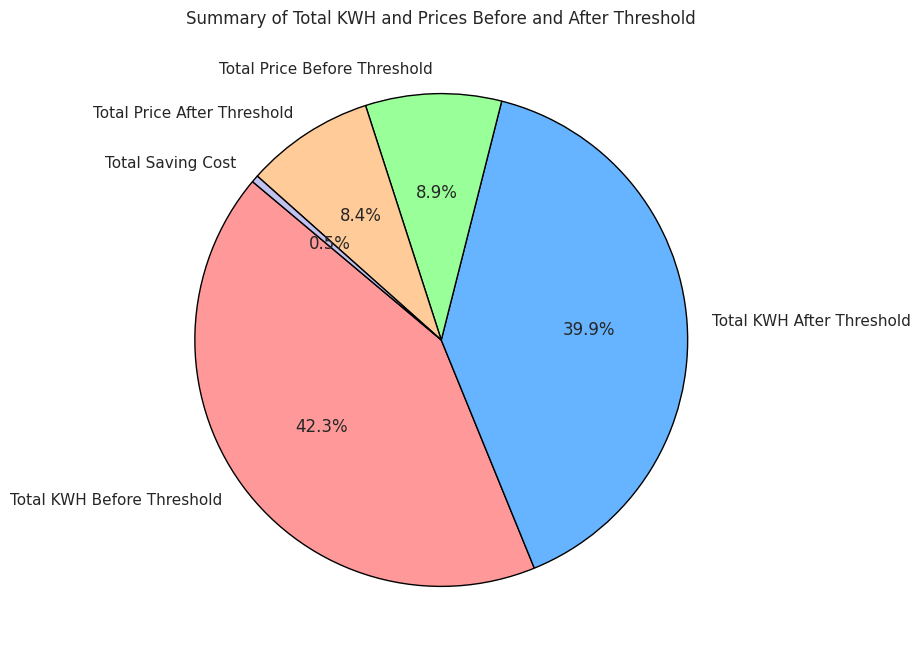

In [109]:
import pandas as pd

# Assuming ab_test_df is already loaded with relevant columns
# Columns needed: ['KWH/hh (per half hour)', 'Demand', 'region']

# Define demand prices in pence per kWh
demand_prices = {
    'High': 77.21,    # High price in pence
    'Normal': 19.46,  # Normal price in pence
    'Low': 6.89       # Low price in pence
}

# Calculate the region-specific threshold (25th percentile per region)
def calculate_region_threshold(group):
    return group['KWH/hh (per half hour)'].quantile(0.25)

# Apply the threshold calculation per region
region_thresholds = ab_test_df.groupby('region').apply(calculate_region_threshold)
print("Region-specific thresholds:", region_thresholds)

# Now apply region-specific threshold to the dataset
def apply_region_threshold(row, thresholds):
    region = row['region']
    threshold = thresholds.get(region, 0)  # Get the threshold for that region
    return 0 if row['KWH/hh (per half hour)'] <= threshold else row['KWH/hh (per half hour)']

# Create a new column 'KWH/hh (per half hour) after threshold' based on region-specific thresholds
ab_test_df['KWH/hh (per half hour) after threshold'] = ab_test_df.apply(
    lambda row: apply_region_threshold(row, region_thresholds), axis=1
)

# Convert demand prices to EGP per kWh (divide pence by 100)
ab_test_df['demand_price_EGP'] = ab_test_df['Demand'].map(lambda x: demand_prices[x] / 100)

# Calculate total price before threshold
ab_test_df['total_price(EGP)'] = ab_test_df['KWH/hh (per half hour)'] * ab_test_df['demand_price_EGP']

# Calculate total price after threshold
ab_test_df['total_price(EGP)_after_threshold'] = ab_test_df['KWH/hh (per half hour) after threshold'] * ab_test_df['demand_price_EGP']

# Calculate saving cost
ab_test_df['saving_cost'] = ab_test_df['total_price(EGP)'] - ab_test_df['total_price(EGP)_after_threshold']

# Data for pie chart
labels = ['Total KWH Before Threshold', 'Total KWH After Threshold',
          'Total Price Before Threshold', 'Total Price After Threshold', 'Total Saving Cost']
values = [7387.86, 6970.81, 1558.32, 1475.81, 82.51]

# Colors for each slice
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#c2c2f0']

# Create pie chart
plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})
plt.title('Summary of Total KWH and Prices Before and After Threshold')
plt.show()


In [98]:
# Summarize total KWH and total prices before and after threshold
summary = {
    'Total KWH Before Threshold': ab_test_df['KWH/hh (per half hour)'].sum(),
    'Total KWH After Threshold': ab_test_df['KWH/hh (per half hour) after threshold'].sum(),
    'Total Price Before Threshold (EGP)': ab_test_df['total_price(EGP)'].sum(),
    'Total Price After Threshold (EGP)': ab_test_df['total_price(EGP)_after_threshold'].sum(),
    'Total Saving Cost (EGP)': ab_test_df['saving_cost'].sum()
}

# Display summary
print("Summary of Total KWH and Prices Before and After Threshold:")
for key, value in summary.items():
    print(f"{key}: {value:.2f} EGP")


Summary of Total KWH and Prices Before and After Threshold:
Total KWH Before Threshold: 7387.86 EGP
Total KWH After Threshold: 6970.81 EGP
Total Price Before Threshold (EGP): 1558.32 EGP
Total Price After Threshold (EGP): 1475.81 EGP
Total Saving Cost (EGP): 82.51 EGP


Energy Consumption Before vs After Threshold

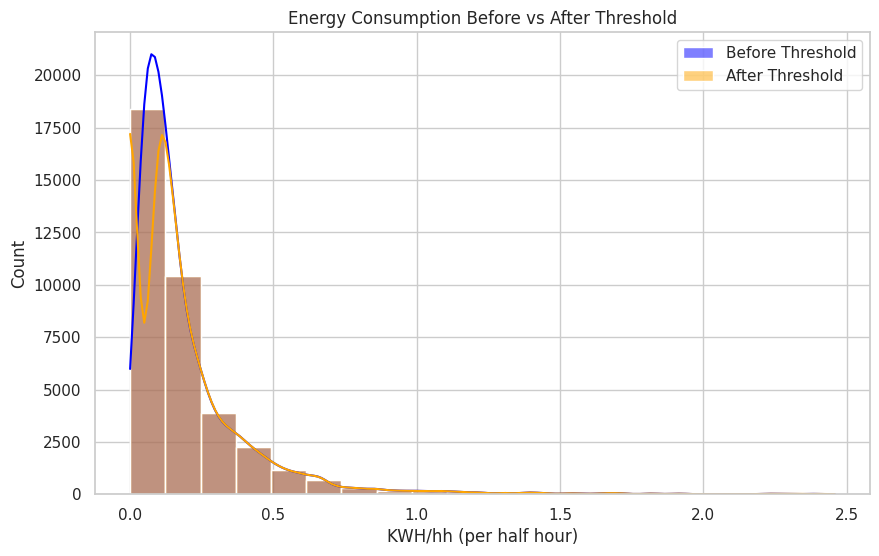

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set(style="whitegrid")

# Step 1: Energy Consumption Before vs After Threshold
plt.figure(figsize=(10, 6))
sns.histplot(ab_test_df['KWH/hh (per half hour)'], bins=20, kde=True, label='Before Threshold', color='blue')
sns.histplot(ab_test_df['KWH/hh (per half hour) after threshold'], bins=20, kde=True, label='After Threshold', color='orange')
plt.title('Energy Consumption Before vs After Threshold')
plt.xlabel('KWH/hh (per half hour)')
plt.ylabel('Count')
plt.legend()
plt.show()


In [100]:
pip install plotly


In [101]:
import plotly.express as px

# Aggregating total price before and after threshold by region (or replace 'region' with another column)
df2 = ab_test_df.groupby('region', as_index=False).agg({
    'total_price(EGP)': 'sum',
    'total_price(EGP)_after_threshold': 'sum'
})

# Melt the data for easy plotting
df_melted = df2.melt(id_vars='region', value_vars=['total_price(EGP)', 'total_price(EGP)_after_threshold'],
                     var_name='Price Type', value_name='Total Price (EGP)')

# Create the bar chart
fig = px.bar(
    df_melted,
    x='region',
    y='Total Price (EGP)',
    text='Total Price (EGP)',
    color='Price Type',
    barmode='group',  # Grouped bar chart
    title="Comparison of Total Price Before and After Threshold by Region",
    labels={'Total Price (EGP)': 'Total Price (EGP)', 'region': 'Region'}
)

# Customize text positions and formatting
fig.update_traces(
    texttemplate='%{text:.2s}',  # Format text to shorten large numbers
    textposition='outside'       # Display text outside the bars
)

# Update layout for clarity
fig.update_layout(
    xaxis_title="Region",
    yaxis_title="Total Price (EGP)",
    plot_bgcolor='white',
    template='plotly_white'
)

# Show the chart
fig.show()


In [102]:
import plotly.graph_objects as go

# Calculate total prices
total_price_before = ab_test_df['total_price(EGP)'].sum()
total_price_after = ab_test_df['total_price(EGP)_after_threshold'].sum()

# Create a bar chart
fig = go.Figure()

# Bar for Total Price Before Threshold
fig.add_trace(go.Bar(
    x=["Total Price Before Threshold"],
    y=[total_price_before],
    name="Before Threshold",
    marker_color='Light Blue',
    text=[f"{total_price_before:.2f} EGP"],
    textposition='outside'
))

# Bar for Total Price Light BlueAfter Threshold
fig.add_trace(go.Bar(
    x=["Total Price After Threshold"],
    y=[total_price_after],
    name="After Threshold",
    marker_color='Coral',
    text=[f"{total_price_after:.2f} EGP"],
    textposition='outside'
))

# Update layout
fig.update_layout(
    title="Comparison of Total Price Before and After Threshold",
    xaxis_title="Threshold Type",
    yaxis_title="Total Price (EGP)",
    plot_bgcolor='white',
    template="plotly_white",
    showlegend=False  # Hide legend for simplicity
)

# Show the chart
fig.show()


# Summary of Key Insights
1. Regional Differences in Energy Consumption:
    * Insight: There are significant differences in energy consumption across regions.

    * Implication: Higher energy consumption in certain regions may be due to factors such as industrial activity, population density, or inefficient energy use.
Actionable Insight: Further investigation is needed to identify the main causes of high consumption in specific regions. Implement targeted energy-saving initiatives in regions with high consumption to optimize energy use.



2. Energy Consumption During Peak Hours:
 * Insight: Energy consumption is significantly higher during peak hours (e.g., 9 AM to 5 PM) compared to night time.
 * Implication: Peak demand periods, often due to business operations and household usage, strain the energy grid and increase costs.
 * Actionable Insight: Demand-side management strategies should be implemented to shift energy consumption to off-peak hours. Additionally, time-of-use pricing can be introduced to encourage lower energy consumption during peak hours.



3. Cell Shutting for Energy Savings:
  * Insight: By shutting down low consumption cells, significant energy savings were achieved.
  * Implication: Identifying and shutting down non-essential cells during low consumption periods can help reduce overall energy demand and lower costs.
  * Actionable Insight: Expand this strategy by targeting cells or equipment that show consistently low energy consumption, and implement an automated system to shut down these units during non-peak hours.

4. Occasional High Energy Consumption:

  * Insight: Sometimes, there may be high energy consumption during a specific hour or half-hour due to factors such as the purchase of new equipment or the installation of an energy-intensive device. These devices may draw a significant amount of energy, causing temporary spikes in consumption.
  * Implication: This is normal behavior, as energy-hungry devices can lead to short-term increases in consumption.
   * Actionable Insight: It's important to track these events over time to distinguish between isolated incidents and recurring patterns. This can help prevent misinterpretation of data when analyzing energy consumption.
5. Electricity Outages or Meter Disruptions:

  * Insight: High consumption does not always indicate something wrong. Sometimes, electricity outages or meter disruptions (e.g., the meter being turned off) can lead to irregular readings or unexpected consumption patterns.
  * Implication: These instances should be taken into account when analyzing data, as they can artificially inflate consumption records.
  * Actionable Insight: Verification of the data source for inconsistencies such as power cuts or equipment issues will help improve the accuracy of the analysis. It is critical to filter out these disruptions to avoid incorrect conclusions about energy consumption behavior

In [103]:
!pip install dash

In [104]:
!pip install dash-core-components

In [105]:
!pip install dash-html-components

In [111]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
import pandas as pd

# Create a simple app
app = dash.Dash(__name__)

app.layout = html.Div([
    html.H1("Energy Consumption Dashboard", style={'textAlign': 'center', 'color': '#4B9CD3'}),

    # Key Metrics Section
    html.Div([
        html.Div(f"Total Energy Consumption: {ab_test_df['KWH/hh (per half hour)'].sum()} kWh", style={'padding': '10px', 'fontSize': '18px'}),
        html.Div(f"Total Cost: {ab_test_df['total_price(EGP)'].sum()} EGP", style={'padding': '10px', 'fontSize': '18px'}),
    ], style={'display': 'flex', 'justifyContent': 'space-between', 'padding': '20px'}),

    # Visualizations Section
    html.Div([
        # Bar chart for Energy Consumption by Region
        dcc.Graph(
            id='energy-consumption-by-region',
            figure=px.bar(ab_test_df, x='region', y='KWH/hh (per half hour)',
                          title='Energy Consumption by Region',
                          color='region',
                          color_discrete_map={'North': '#1f77b4', 'South': '#ff7f0e', 'East': '#2ca02c', 'West': '#d62728'},
                          labels={'KWH/hh (per half hour)': 'Energy Consumption (kWh)', 'region': 'Region'})
        ),

        # Line chart for Energy Consumption by Time of Day
        dcc.Graph(
            id='energy-consumption-by-time',
            figure=px.line(ab_test_df, x='Time_of_day', y='KWH/hh (per half hour)',
                           title='Energy Consumption by Time of Day',
                           markers=True,
                           line_shape='linear',
                           color='Time_of_day',
                           color_discrete_sequence=['#FF6347', '#4682B4', '#32CD32', '#FFD700'])
        )
    ])
])

# Run the app
if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>

In [107]:
# Save ab_test_df to csv
ab_test_df.to_csv('/content/drive/MyDrive/Colab Notebooks/Carerha/Tasks/df_final.csv')